<a href="https://colab.research.google.com/github/Abdullah-47/PaisaBazaar-Credit-Score-Prediction/blob/main/PaisaBazaar_Credit_Score_Prediction_ML_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - PaisaBazaar Credit Score Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Abdullah-47/PaisaBazaar-Credit-Score-Prediction

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
# Load the training data
try:
    df_train = pd.read_csv("https://huggingface.co/datasets/Abdullah4747/PaisaBazaar_Credit_Score/resolve/main/CreditScore_data.csv")#Read the dataset uploaded on huggingface
    print("Training data loaded successfully.")
except FileNotFoundError:
    print("Error: dataset not found.")
    df_train = pd.DataFrame()  # Initialize an empty DataFrame to avoid further errors

except Exception as e:
    print(f"An error occurred while loading Dataset: {e}")
    df_train = pd.DataFrame()

Training data loaded successfully.


### Dataset First View

In [3]:
# Dataset First Look
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df_train.shape

(100000, 28)

### Dataset Information

In [5]:
# Dataset Info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df_train.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df_train.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


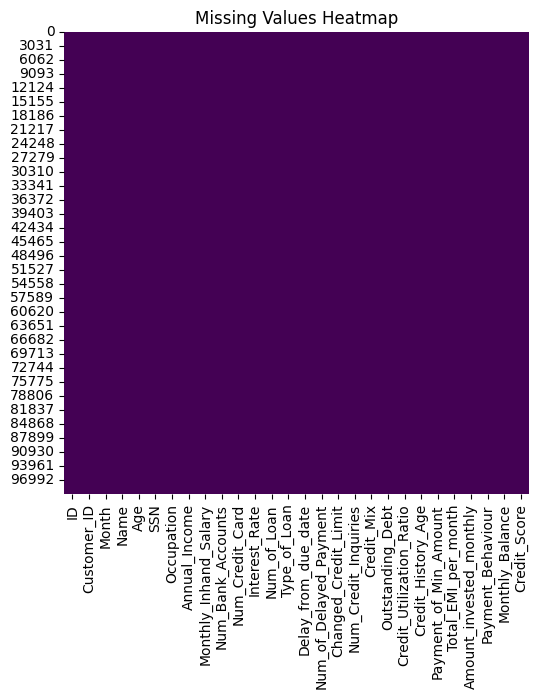

In [8]:
# Visualizing the missing values
plt.figure(figsize=(6, 6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

### 1\. Basic Structure

-   100,000 rows (entries) and 28 columns (features)

-   No missing values (all columns have 100,000 non-null entries)

-   Data types:

    -   18 float columns (numerical)

    -   3 integer columns (numerical)

    -   7 object columns (categorical/text)

### 2\. Key Features

-   Customer Identification:

    -   `ID` (unique record identifier)

    -   `Customer_ID` (reusable customer identifier, e.g., Aaron Maashoh appears in multiple rows)

    -   `Name` (customer names)

-   Temporal Data:

    -   `Month` (tracks monthly records per customer)

-   Demographics:

    -   `Age`, `SSN`, `Occupation`

-   Financial Metrics:

    -   Income: `Annual_Income`, `Monthly_Inhand_Salary`

    -   Credit: `Num_Bank_Accounts`, `Num_Credit_Card`, `Interest_Rate`, `Outstanding_Debt`

    -   Loans: `Num_of_Loan`, `Type_of_Loan` (multi-value strings like "Auto Loan, Mortgage Loan")

    -   Payment Behavior: `Delay_from_due_date`, `Num_of_Delayed_Payment`, `Payment_of_Min_Amount`

    -   Credit History: `Credit_Mix` (Good/Standard/Bad), `Credit_History_Age`, `Num_Credit_Inquiries`

-   Behavioral Metrics:

    -   `Payment_Behaviour` (e.g., "High_spent_Small_value_payments")

    -   `Monthly_Balance`, `Amount_invested_monthly`, `Total_EMI_per_month`

-   Target Variable:

    -   `Credit_Score` (categorical: Good/Standard/Poor)

### 3\. Data Patterns (from Sample)

-   Time-series nature: Customers have multiple monthly entries (e.g., Aaron Maashoh has 8 months of records).

-   Credit Dynamics:

    -   Features like `Changed_Credit_Limit`, `Credit_Utilization_Ratio` track credit flexibility.

    -   `Num_of_Delayed_Payment` and `Delay_from_due_date` indicate payment punctuality.

-   Anomalies:

    -   `SSN` stored as float (should be string).

    -   `Type_of_Loan` contains concatenated strings (requires parsing).

    -   `Credit_History_Age` is a float (could be months/years).

    -   `Age` is float but should likely be integer.

### 4\. Target Variable Insights

-   `Credit_Score` is categorical with 3 classes: Good, Standard, Poor.

-   Appears linked to financial behavior:

    -   *Good credit* correlates with low delays (e.g., Aaron Maashoh: 3-8 days delay).

    -   *Poor credit* correlates with high delays (e.g., Annk: 30+ days delay, high `Num_of_Delayed_Payment`).

### 5\. Potential Use Cases

-   Credit Risk Modeling: Predict `Credit_Score` using financial/behavioral features.

-   Customer Segmentation: Group by `Payment_Behaviour` or `Occupation`.

-   Trend Analysis: Track changes in `Monthly_Balance` or `Outstanding_Debt` over months.

### 6\. Data Quality Notes

-   No missing values (unusual for real-world data; may be preprocessed).

-   Inconsistent formatting:

    -   `Type_of_Loan` entries are irregular (e.g., "Auto Loan, and Not Specified").

    -   `Payment_of_Min_Amount` has non-binary values ("No", "Yes", "NM").

-   Suspicious values:

    -   `Age` = 16 (Toonkeln) and 54 (Jasond) -- validate realism.

    -   `SSN` as float implies anonymization/transformations.

### Summary

This is a clean, time-series dataset of customer credit profiles with granular monthly financial behavior. Key focuses include payment patterns (`Delay_from_due_date`, `Num_of_Delayed_Payment`), credit health (`Credit_Mix`, `Credit_Utilization_Ratio`), and the target outcome (`Credit_Score`). Preprocessing may be needed for categorical columns like `Type_of_Loan` and `Payment_Behaviour`.

## ***2. Understanding Your Variables***

In [9]:
df_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [10]:
# Dataset Describe
df_train.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


### Variables Description



Based on the column names and the output of the `df_train.describe()` function, here's a description of each variable:

**ID:** Unique identifier for each row/record. It is an integer.

**Customer_ID:** Identifier for each customer. A single customer can have multiple records across different months. It is an integer.

**Month:** The month of the record, ranging from 1 to 8. It is an integer.

**Name:** The name of the customer. This is an object type, likely a string.

**Age:** The age of the customer. It is a float, with a minimum age of 14 and a maximum of 56.

**SSN:** Social Security Number of the customer. Stored as a float, which might indicate anonymization or a need for type conversion to string.

**Occupation:** The occupation of the customer. This is an object type, likely a string representing different job titles.

**Annual_Income:** The annual income of the customer. It is a float, with a wide range from 7005.93 to 179987.28.

**Monthly_Inhand_Salary:** The monthly in-hand salary of the customer. It is a float, derived from the annual income.

**Num_Bank_Accounts:** The number of bank accounts the customer holds. It is a float, ranging from 0 to 11.

**Num_Credit_Card:** The number of credit cards the customer holds. It is a float, ranging from 0 to 11.

**Interest_Rate:** The interest rate on the customer's loans. It is a float, ranging from 1 to 34.

**Num_of_Loan:** The number of loans the customer has. It is a float.

**Type_of_Loan:** The types of loans the customer has. This is an object type, likely a string that can contain multiple loan types separated by commas.

**Delay_from_due_date:** The average number of days the customer delays payment from the due date. It is a float, ranging from 0 to 62.

**Num_of_Delayed_Payment:** The number of delayed payments the customer has made. It is a float, ranging from 0 to 25.

**Changed_Credit_Limit:** The amount by which the credit limit has changed. It is a float, ranging from 0.5 to 29.98.

**Num_Credit_Inquiries:** The number of credit inquiries made for the customer. It is a float, ranging from 0 to 17.

**Credit_Mix:** The mix of the customer's credit accounts (e.g., Good, Standard, Bad). This is an object type, likely a string.

**Outstanding_Debt:** The amount of outstanding debt the customer has. It is a float, ranging from 0.23 to 4998.07.

**Credit_Utilization_Ratio:** The ratio of credit used to the total credit available. It is a float, ranging from 20 to 50.

**Credit_History_Age:** The age of the customer's credit history. It is a float, ranging from 1 to 404. This likely represents months.

**Payment_of_Min_Amount:** Whether the customer pays the minimum amount due. This is an object type, likely a string with values like "Yes", "No", or "NM".

**Total_EMI_per_month:** The total Equated Monthly Installment (EMI) the customer pays. It is a float, ranging from 0 to 1779.10.

**Amount_invested_monthly:** The amount invested by the customer monthly. It is a float, ranging from 0 to 434.19.

**Payment_Behaviour:** The payment behavior of the customer (e.g., High_spent_Small_value_payments). This is an object type, likely a string.

**Monthly_Balance:** The monthly balance of the customer's accounts. It is a float, ranging from 0.007760 to 1183.930696.

**Credit_Score:** The credit score of the customer (target variable). This is an object type, likely a string with values like "Good", "Standard", or "Poor".

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for column in df_train.columns:
    unique_values = df_train[column].unique()
    print(f"Unique values for {column}: {unique_values}")


Unique values for ID: [  5634   5635   5636 ... 155627 155628 155629]
Unique values for Customer_ID: [ 3392  8625 11708 ... 44897 34304 37932]
Unique values for Month: [1 2 3 4 5 6 7 8]
Unique values for Name: ['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
Unique values for Age: [23. 28. 34. 54. 55. 21. 31. 33. 30. 24. 44. 45. 40. 41. 32. 35. 36. 39.
 37. 20. 46. 26. 42. 19. 48. 38. 43. 22. 16. 18. 15. 27. 25. 14. 17. 47.
 53. 56. 29. 49. 51. 50. 52.]
Unique values for SSN: [8.21000265e+08 4.07583900e+06 4.86853974e+08 ... 1.33167738e+08
 3.13509420e+07 7.87359900e+07]
Unique values for Occupation: ['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
Unique values for Annual_Income: [ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]
Unique values for Monthly_Inhand_Salary: [ 1824.84333333  3037.98666667 1

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

# Handle inconsistent formatting and suspicious values
df_train['SSN'] = df_train['SSN'].astype(str)
df_train['Age'] = df_train['Age'].astype(int)

# Create a new feature 'Num_of_Distinct_Loan_Types' by parsing the 'Type_of_Loan' column
# to count the number of unique loan types for each customer, addressing the identified issue with this column's format.
df_train['Num_of_Distinct_Loan_Types'] = df_train['Type_of_Loan'].apply(lambda x: len(set([loan.strip() for loan in x.split(',') if 'Not Specified' not in loan])))

# Standardize the values in the 'Payment_of_Min_Amount' column by mapping 'NM' to 'No'
# to handle the inconsistent entry and ensure consistent representation of payment behavior.
df_train['Payment_of_Min_Amount'] = df_train['Payment_of_Min_Amount'].replace('NM', 'No')


# Analyze the relationships between numerical features, particularly between 'Annual_Income' and
# 'Monthly_Inhand_Salary', and consider if one should be dropped or transformed.
correlation = df_train['Annual_Income'].corr(df_train['Monthly_Inhand_Salary'])
print(f"Correlation between Annual_Income and Monthly_Inhand_Salary: {correlation}")

# Create new features that might be helpful for analysis, such as the number of distinct loan types.
df_train['Num_of_Distinct_Loan_Types'] = df_train['Type_of_Loan'].apply(lambda x: len(set([loan.strip() for loan in x.split(',') if 'Not Specified' not in loan])))

#  Based on the high correlation, I will drop the 'Annual_Income' column.
# I will also convert 'Credit_History_Age' from months to years for better interpretability.
df_train = df_train.drop('Annual_Income', axis=1)
df_train['Credit_History_Age_Years'] = df_train['Credit_History_Age'] / 12



Correlation between Annual_Income and Monthly_Inhand_Salary: 0.998153824474035


In [13]:
# Verifying if data is analysis ready or not.
df_train.info()

print("\nUnique values count for each column:")
for column in df_train.columns:
    print(f"{column}: {df_train[column].nunique()} unique values")

print("\nDescriptive statistics for numerical columns:")
display(df_train.describe())

print("\nDescriptive statistics for object columns:")
display(df_train.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          100000 non-null  int64  
 1   Customer_ID                 100000 non-null  int64  
 2   Month                       100000 non-null  int64  
 3   Name                        100000 non-null  object 
 4   Age                         100000 non-null  int64  
 5   SSN                         100000 non-null  object 
 6   Occupation                  100000 non-null  object 
 7   Monthly_Inhand_Salary       100000 non-null  float64
 8   Num_Bank_Accounts           100000 non-null  float64
 9   Num_Credit_Card             100000 non-null  float64
 10  Interest_Rate               100000 non-null  float64
 11  Num_of_Loan                 100000 non-null  float64
 12  Type_of_Loan                100000 non-null  object 
 13  Delay_from_due_

,ID,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Num_of_Distinct_Loan_Types,Credit_History_Age_Years
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,...,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586,2.831600,18.435038
std,43301.486619,14340.543051,2.291299,10.764812,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,...,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719,1.616932,8.306726
min,5634.000000,1006.000000,1.000000,14.000000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,...,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760,0.000000,0.083333
25%,43132.750000,13664.500000,2.750000,24.000000,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,...,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983,1.000000,12.000000
50%,80631.500000,25777.000000,4.500000,33.000000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,...,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366,3.000000,18.250000
75%,118130.250000,38385.000000,6.250000,42.000000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,...,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683,4.000000,25.166667
max,155629.000000,50999.000000,8.000000,56.000000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,...,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696,8.000000,33.666667



Descriptive statistics for object columns:


,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000,100000
unique,10128,12500,15,6261,3,2,6,3
top,Stevex,78735990.0,Lawyer,No Data,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,48,8,7096,11408,45848,52326,28616,53174


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

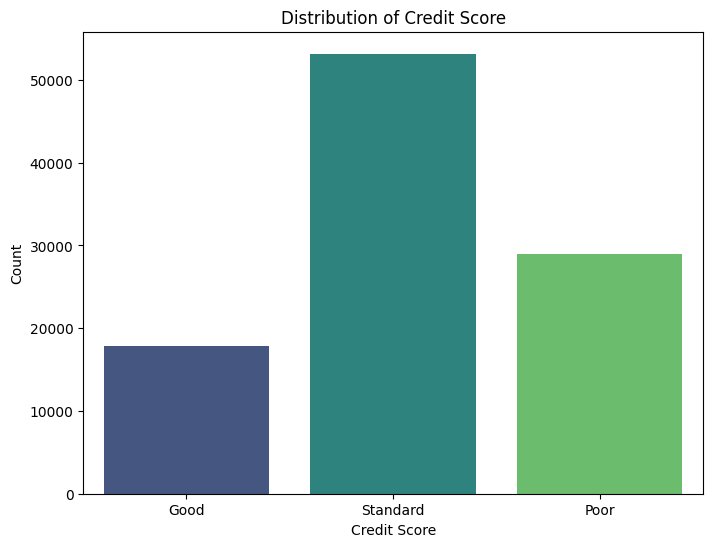

In [14]:
# Chart - 1 visualization code
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Credit_Score', palette='viridis')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

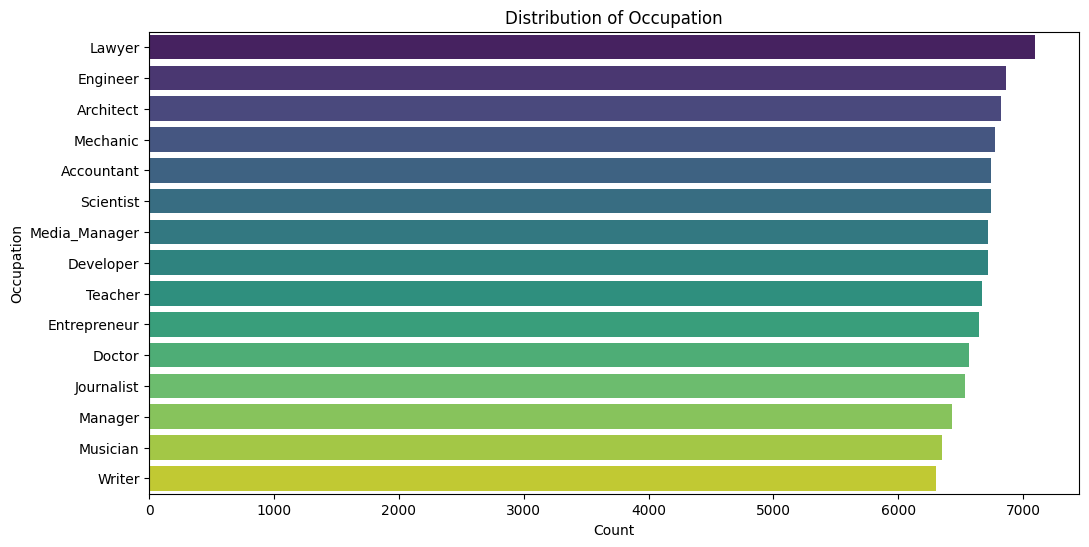

In [15]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, y='Occupation', palette='viridis', order=df_train['Occupation'].value_counts().index)
plt.title('Distribution of Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

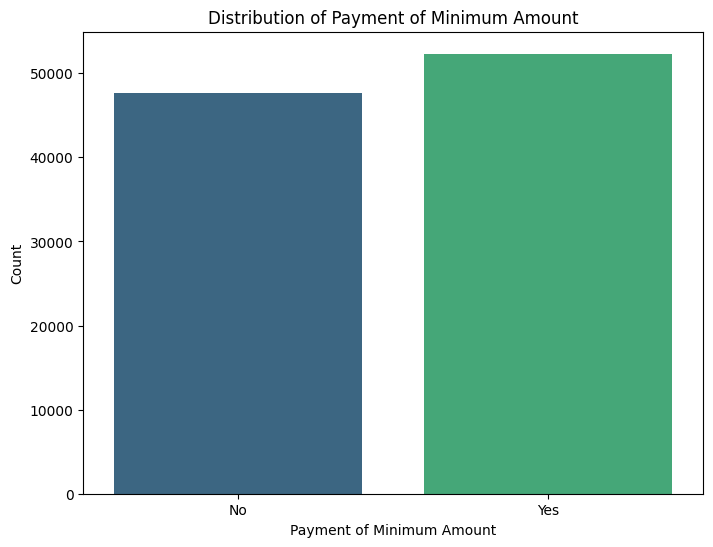

In [16]:
# Chart - 3 visualization code
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Payment_of_Min_Amount', palette='viridis')
plt.title('Distribution of Payment of Minimum Amount')
plt.xlabel('Payment of Minimum Amount')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

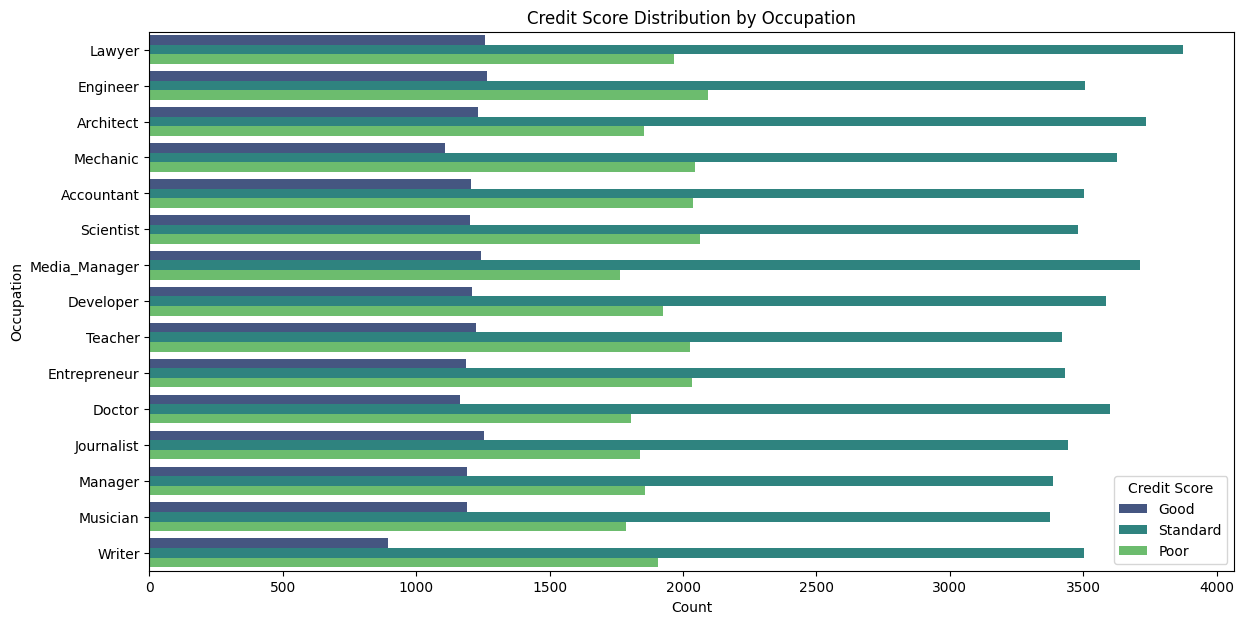

In [17]:
# Chart - 4 visualization code
plt.figure(figsize=(14, 7))
sns.countplot(data=df_train, y='Occupation', hue='Credit_Score', palette='viridis', order=df_train['Occupation'].value_counts().index)
plt.title('Credit Score Distribution by Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.legend(title='Credit Score')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

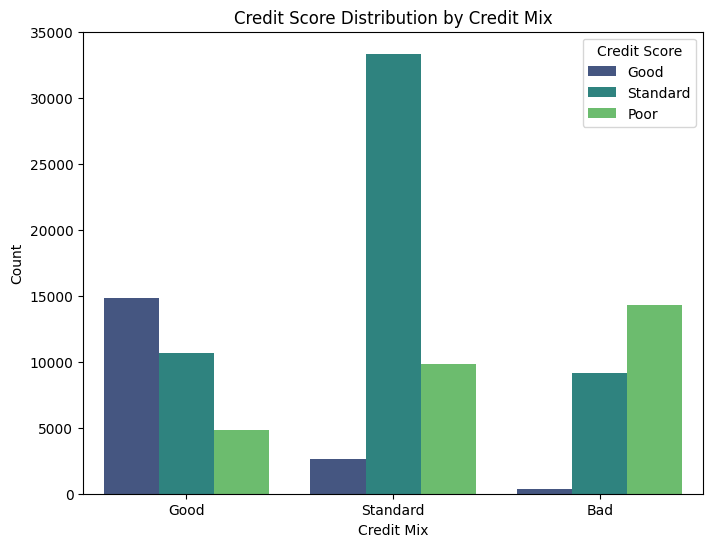

In [18]:
# Chart - 5 visualization code
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Credit_Mix', hue='Credit_Score', palette='viridis')
plt.title('Credit Score Distribution by Credit Mix')
plt.xlabel('Credit Mix')
plt.ylabel('Count')
plt.legend(title='Credit Score')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

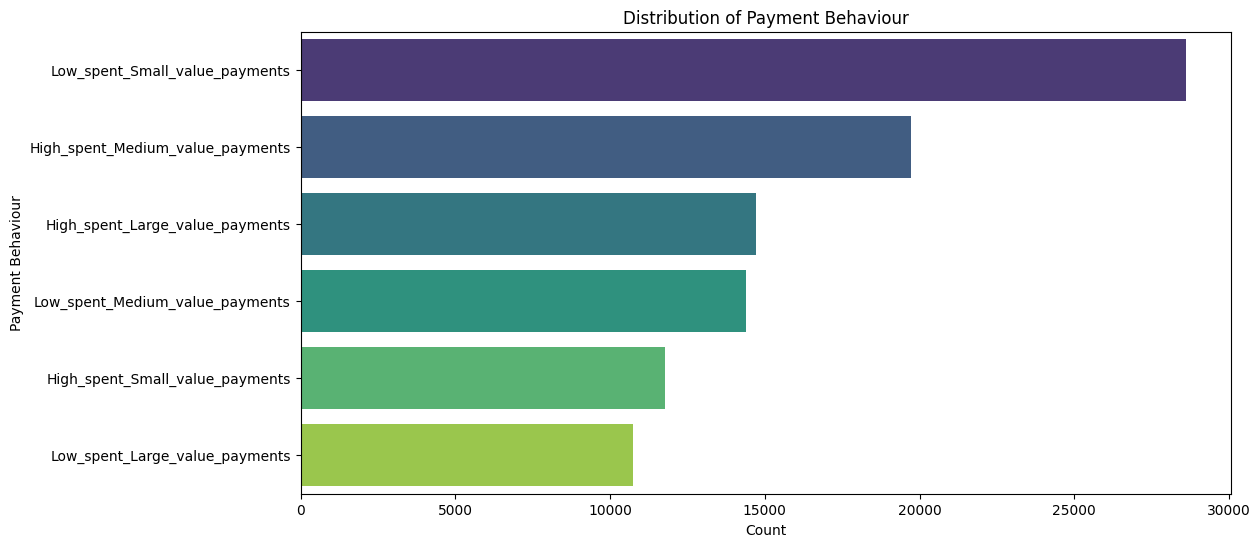

In [19]:
# Chart - 6 visualization code
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, y='Payment_Behaviour', palette='viridis', order=df_train['Payment_Behaviour'].value_counts().index)
plt.title('Distribution of Payment Behaviour')
plt.xlabel('Count')
plt.ylabel('Payment Behaviour')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

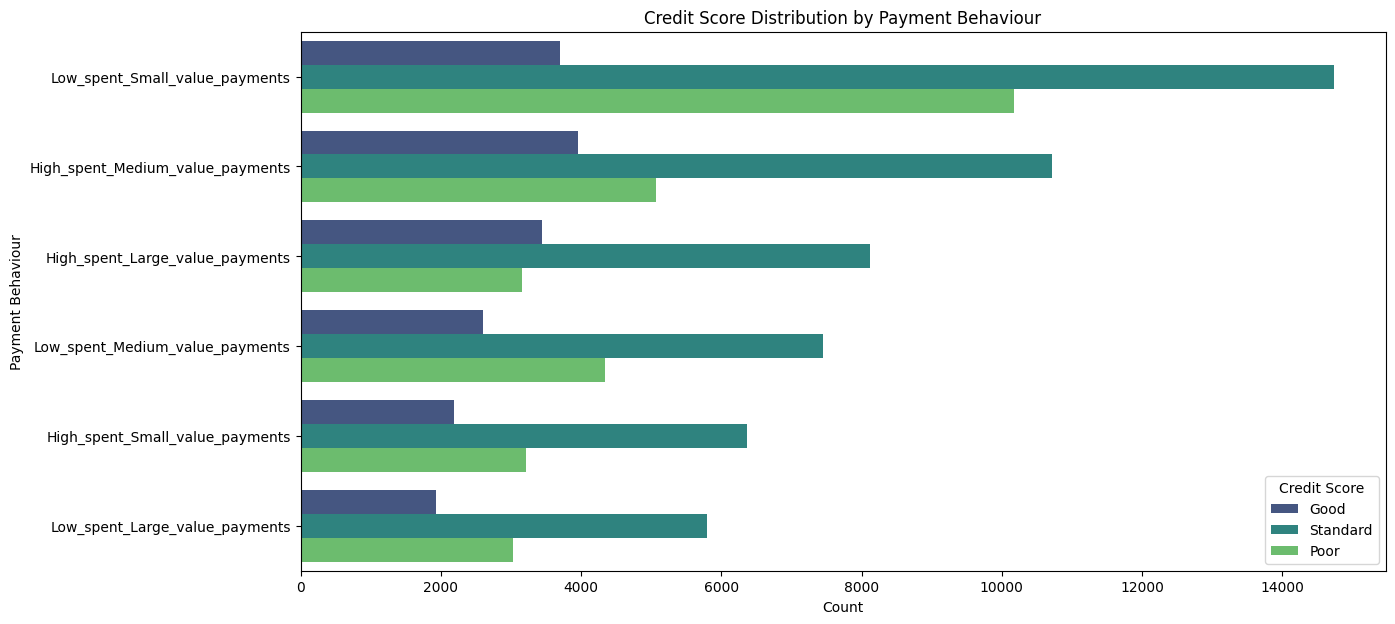

In [20]:
# Chart - 7 visualization code
plt.figure(figsize=(14, 7))
sns.countplot(data=df_train, y='Payment_Behaviour', hue='Credit_Score', palette='viridis', order=df_train['Payment_Behaviour'].value_counts().index)
plt.title('Credit Score Distribution by Payment Behaviour')
plt.xlabel('Count')
plt.ylabel('Payment Behaviour')
plt.legend(title='Credit Score')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

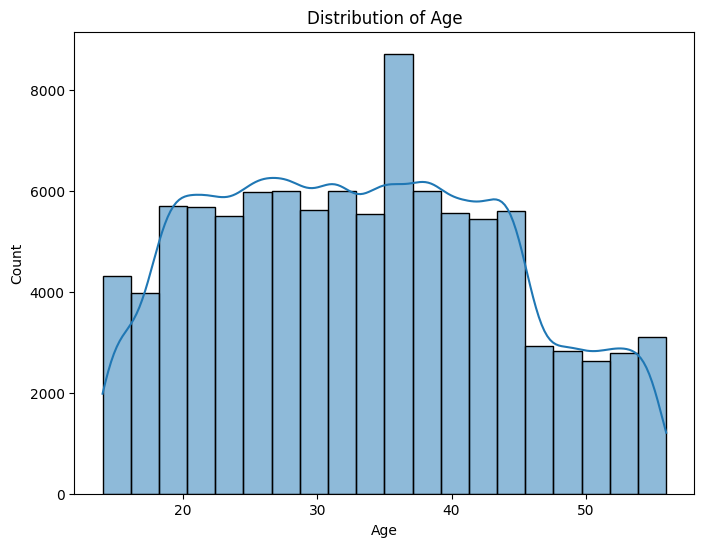

In [21]:
# Chart - 8 visualization code
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='Age', bins=20, kde=True, palette='viridis')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

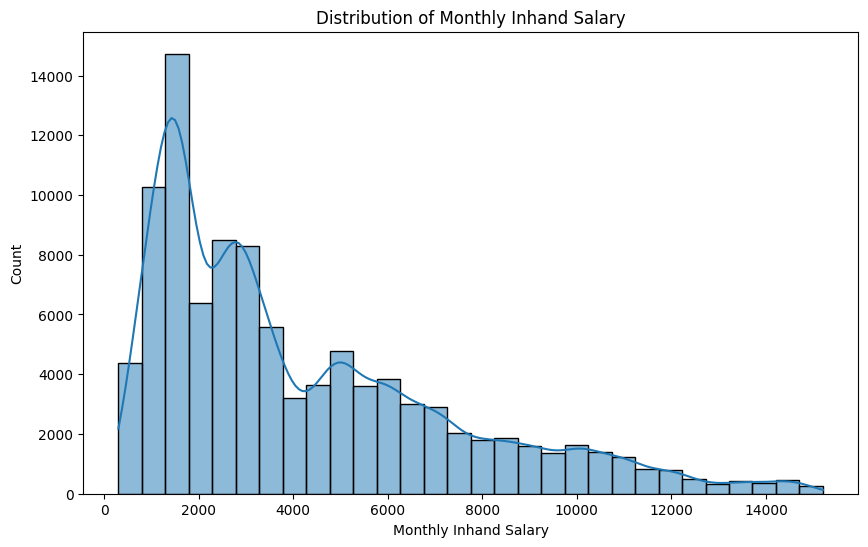

In [22]:
# Chart - 9 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='Monthly_Inhand_Salary', bins=30, kde=True, palette='viridis')
plt.title('Distribution of Monthly Inhand Salary')
plt.xlabel('Monthly Inhand Salary')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

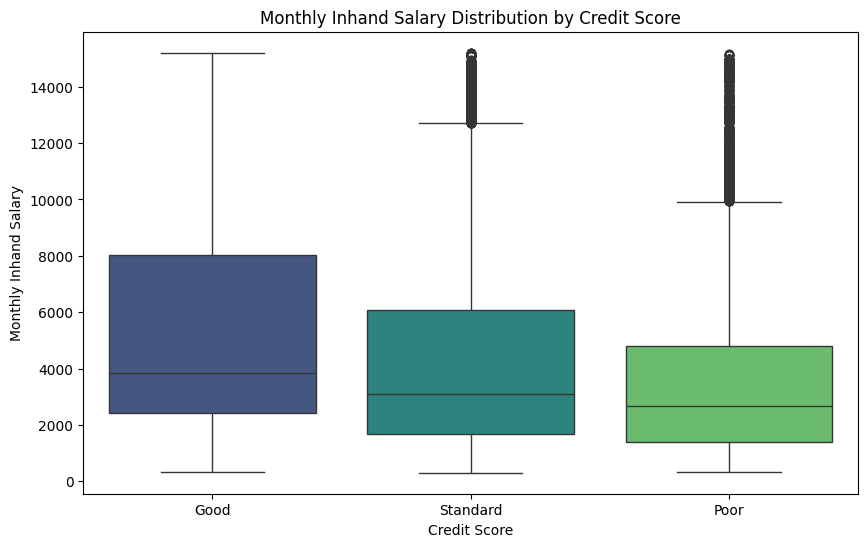

In [23]:
# Chart - 10 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x='Credit_Score', y='Monthly_Inhand_Salary', palette='viridis', order=['Good', 'Standard', 'Poor'])
plt.title('Monthly Inhand Salary Distribution by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Monthly Inhand Salary')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

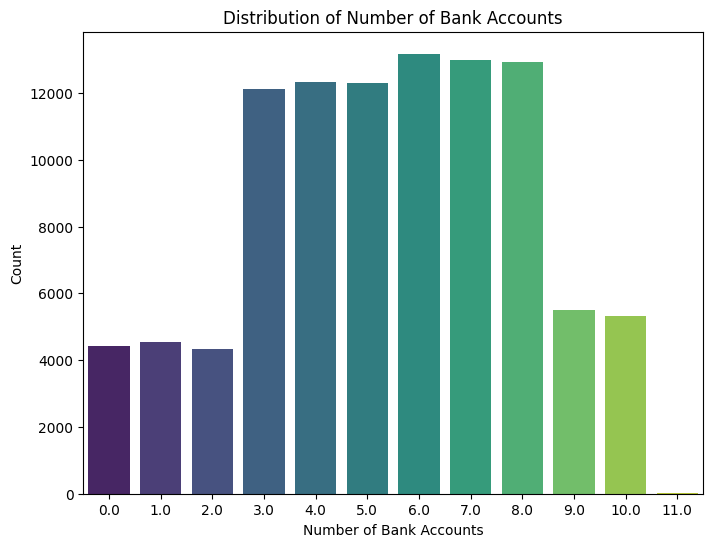

In [24]:
# Chart - 11 visualization code
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Num_Bank_Accounts', palette='viridis')
plt.title('Distribution of Number of Bank Accounts')
plt.xlabel('Number of Bank Accounts')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

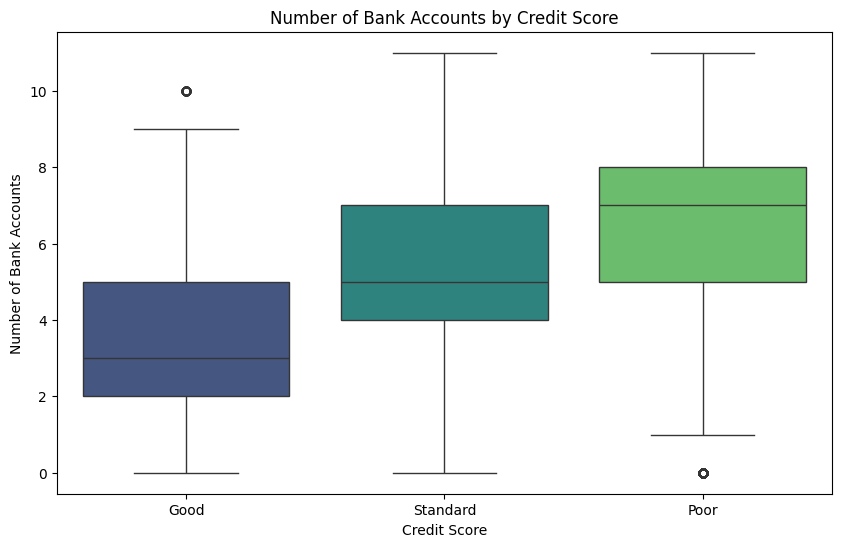

In [25]:
# Chart - 12 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x='Credit_Score', y='Num_Bank_Accounts', palette='viridis', order=['Good', 'Standard', 'Poor'])
plt.title('Number of Bank Accounts by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Number of Bank Accounts')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

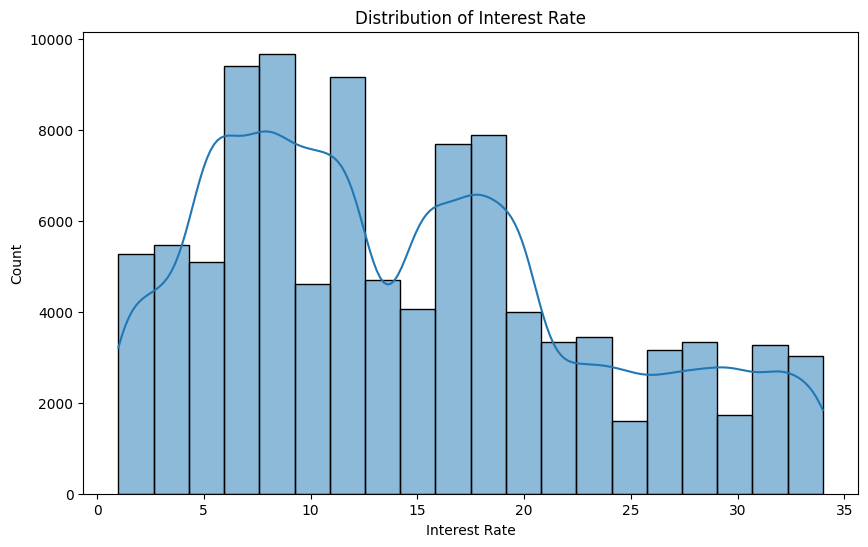

In [26]:
# Chart - 13 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='Interest_Rate', bins=20, kde=True, palette='viridis')
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

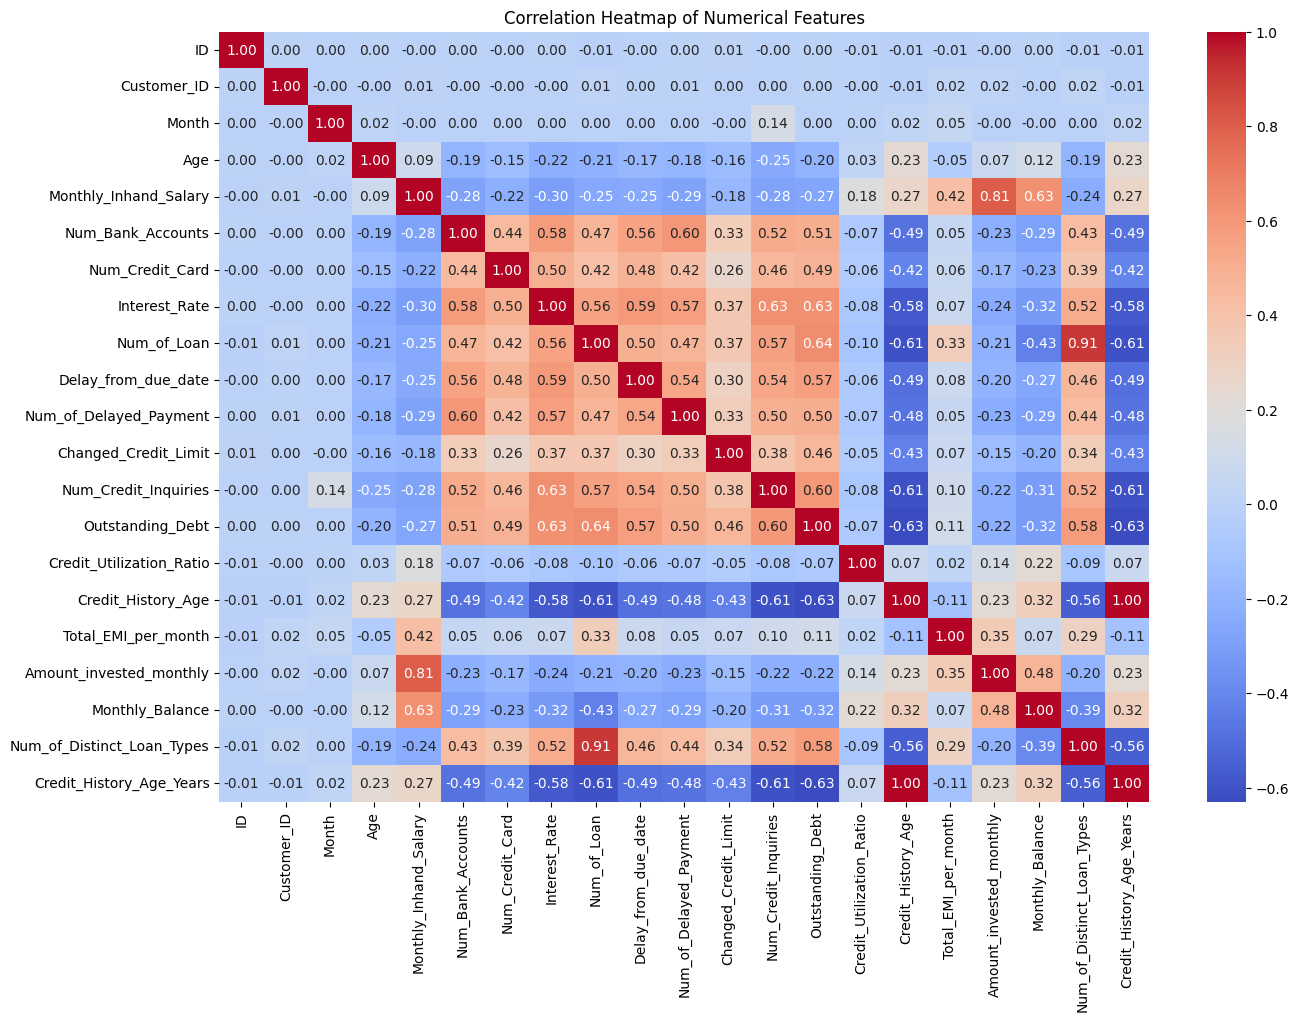

In [27]:
# Chart - 14 - Correlation Heatmap visualization code
plt.figure(figsize=(15, 10))
sns.heatmap(df_train.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

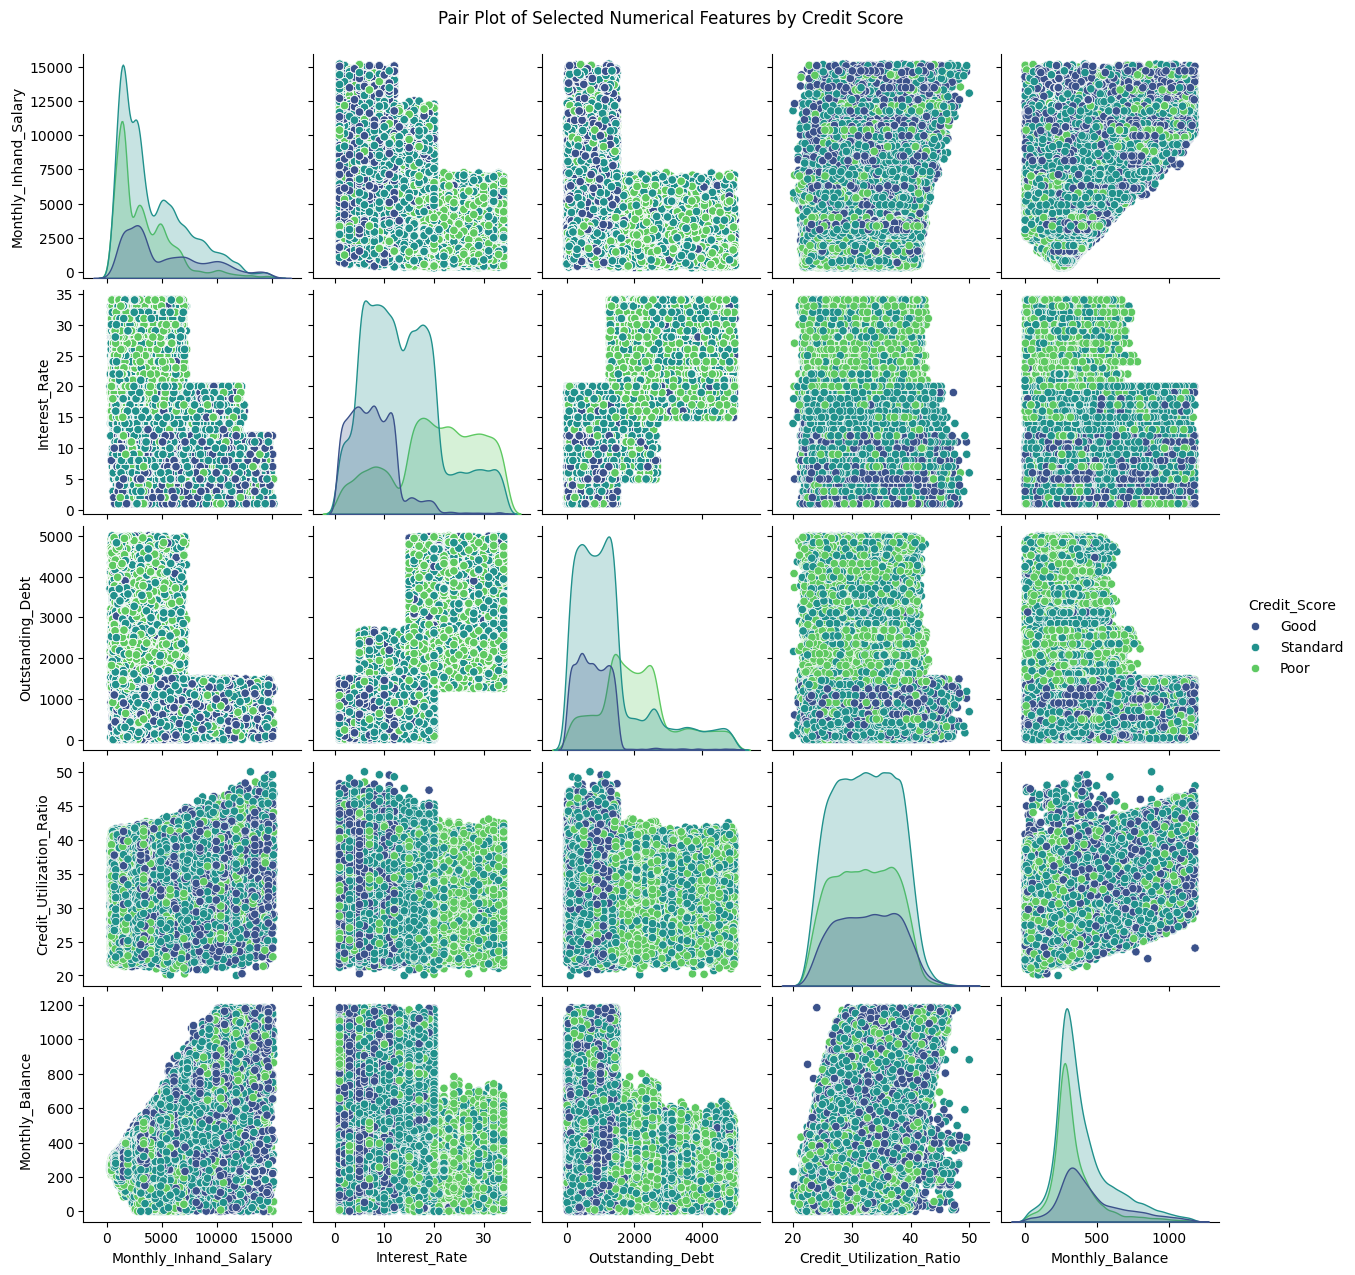

In [28]:
# Chart - 15 - Pair Plot visualization code
numerical_features = ['Monthly_Inhand_Salary', 'Interest_Rate', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Monthly_Balance', 'Credit_Score']
sns.pairplot(df_train[numerical_features], hue='Credit_Score', palette='viridis')
plt.suptitle('Pair Plot of Selected Numerical Features by Credit Score', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [32]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [33]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [34]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [35]:
# Expand Contraction

#### 2. Lower Casing

In [36]:
# Lower Casing

#### 3. Removing Punctuations

In [37]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [38]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [39]:
# Remove Stopwords

In [40]:
# Remove White spaces

#### 6. Rephrase Text

In [41]:
# Rephrase Text

#### 7. Tokenization

In [42]:
# Tokenization

#### 8. Text Normalization

In [43]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [44]:
# POS Taging

#### 10. Text Vectorization

In [45]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [46]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [47]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [48]:
# Transform Your data

### 6. Data Scaling

In [49]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [50]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [51]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [52]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [53]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [54]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [55]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [56]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [57]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [58]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [60]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [61]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [62]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

# Task
Wrangle the data in "/content/CreditScore_data.csv" to make it ready for analysis and visualization.

## Data visualization and storytelling

### Subtask:
Proceed with generating the requested charts and providing insights.


**Reasoning**:
To begin visualizing the data, I will start with univariate analysis of the target variable 'Credit_Score' to understand its distribution. A countplot is a suitable choice for visualizing the frequency of each category in a categorical variable.



**Reasoning**:
Now that I have visualized the distribution of the target variable, I will provide the analysis for Chart 1 as requested by the instructions, explaining why the chart was chosen, the insights gained, and the potential business impact.



In [63]:
# Why did you pick the specific chart?
# A countplot was chosen to visualize the distribution of the 'Credit_Score' variable because it is a categorical variable. A countplot effectively displays the frequency of each category, providing a clear understanding of how the credit scores are distributed across 'Good', 'Standard', and 'Poor'.

# What is/are the insight(s) found from the chart?
# The chart shows the number of instances for each credit score category. It reveals that the 'Standard' credit score is the most frequent, followed by 'Poor', and then 'Good'. This indicates an imbalanced dataset, where the distribution of the target variable is not uniform.

# Will the gained insights help creating a positive business impact?
# Yes, the gained insights are crucial for creating a positive business impact. Understanding the distribution of credit scores allows businesses to identify the largest customer segments ('Standard' and 'Poor'). This information is vital for targeted marketing strategies, risk assessment, and product development. For instance, businesses can develop specific products or services tailored to the 'Standard' and 'Poor' segments, or implement targeted risk mitigation strategies for customers with lower credit scores.
# The insight about the imbalance dataset also leads to negative growth potential if not addressed. Training a model on an imbalanced dataset without using appropriate techniques (like oversampling or undersampling) can lead to a model that is biased towards the majority class ('Standard') and performs poorly in predicting the minority classes ('Good' and 'Poor'). This can result in misclassifying high-risk customers as low-risk or vice versa, leading to financial losses or missed business opportunities. Therefore, recognizing the imbalance is a critical step to ensure accurate modeling and positive business impact.

**Reasoning**:
To continue with univariate analysis, I will visualize the distribution of the 'Occupation' variable using a countplot to see the frequency of each occupation category.



**Reasoning**:
I have visualized the distribution of 'Occupation'. Now I will provide the analysis for Chart 2 as requested by the instructions, explaining the chart choice, insights, and business impact.



In [64]:
# Why did you pick the specific chart?
# A countplot is suitable for visualizing the distribution of a categorical variable like 'Occupation'. Using a horizontal bar chart with 'Occupation' on the y-axis helps in clearly displaying the counts for each occupation, especially when there are multiple categories. Ordering the bars by frequency makes it easy to identify the most common occupations.

# What is/are the insight(s) found from the chart?
# The chart shows the frequency of different occupations among the customers. We can observe which occupations are most represented in the dataset. This gives us an insight into the demographic profile of the customers in terms of their profession.

# Will the gained insights help creating a positive business impact?
# Yes, understanding the distribution of occupations can have a positive business impact. Businesses can tailor their marketing campaigns and product offerings based on the common occupations of their customer base. For example, if 'Engineer' and 'Developer' are the most frequent occupations, financial products or services relevant to these professions could be promoted. This can lead to more effective customer acquisition and engagement strategies. There are no immediate insights from this chart that necessarily lead to negative growth; it primarily provides demographic information for strategic planning.

**Reasoning**:
To continue with univariate analysis, I will visualize the distribution of the 'Payment_of_Min_Amount' variable using a countplot to understand how many customers pay the minimum amount due.



**Reasoning**:
I have visualized the distribution of 'Payment_of_Min_Amount'. Now I will provide the analysis for Chart 3 as requested by the instructions, explaining the chart choice, insights, and business impact.



In [65]:
# Why did you pick the specific chart?
# A countplot is appropriate for visualizing the distribution of a categorical variable like 'Payment_of_Min_Amount'. It clearly shows the number of customers in each category ('Yes' and 'No' after cleaning), making it easy to understand the proportion of customers who pay the minimum amount due.

# What is/are the insight(s) found from the chart?
# The chart reveals that a significant portion of customers pay only the minimum amount due. This indicates their payment behavior and potentially their financial habits or constraints.

# Will the gained insights help creating a positive business impact?
# Yes, this insight has a direct business impact. Customers who consistently pay only the minimum amount might be at a higher risk of accumulating debt and potentially defaulting. Businesses can use this information to identify these customers and offer financial counseling, alternative payment plans, or educational resources to help them manage their debt more effectively. This proactive approach can lead to reduced defaults and improved customer retention. Conversely, a high proportion of customers only paying the minimum could signal potential financial distress within the customer base, which could lead to negative growth if not addressed with appropriate strategies.

**Reasoning**:
To explore the relationship between 'Credit_Score' and 'Occupation', I will use a countplot with 'Occupation' on the y-axis and 'Credit_Score' as the hue. This bivariate analysis will show the distribution of credit scores within each occupation category.



**Reasoning**:
I have visualized the relationship between 'Credit_Score' and 'Occupation'. Now I will provide the analysis for Chart 4 as requested by the instructions, explaining the chart choice, insights, and business impact.



In [66]:
# Why did you pick the specific chart?
# A grouped countplot is effective for visualizing the relationship between two categorical variables: 'Occupation' and 'Credit_Score'. By using 'Occupation' on the y-axis and 'Credit_Score' as the hue, we can easily compare the distribution of credit scores across different occupations and identify if certain occupations are more associated with specific credit score categories.

# What is/are the insight(s) found from the chart?
# The chart shows the breakdown of credit scores within each occupation. We can see the proportion of Good, Standard, and Poor credit scores for each profession. This helps in understanding if there are any notable differences in creditworthiness based on occupation. For example, some occupations might have a higher proportion of Good credit scores compared to others.

# Will the gained insights help creating a positive business impact?
# Yes, these insights can lead to positive business impacts. Identifying occupations with a higher likelihood of having good credit scores can help businesses in targeting their premium financial products or services to these groups, potentially increasing profitability and reducing risk. Conversely, occupations with a higher proportion of poor credit scores might require different strategies, such as offering educational resources or more secured financial products. This allows for more effective risk management and tailored customer engagement. There aren't necessarily insights that directly lead to negative growth from this chart, but a higher concentration of poor credit scores in certain occupations could indicate areas where businesses need to be more cautious or implement specific risk mitigation measures.

## Data visualization and storytelling

### Subtask:
Proceed with generating the requested charts and providing insights.


**Reasoning**:
Generate a grouped countplot to visualize the relationship between 'Credit_Score' and 'Credit_Mix'.



**Reasoning**:
Provide detailed answers for the questions based on the generated chart.



In [67]:
# Why did you pick the specific chart?
# A grouped countplot is suitable for examining the relationship between two categorical variables, 'Credit_Mix' and 'Credit_Score'. By grouping the bars by 'Credit_Mix' and using 'Credit_Score' as the hue, we can effectively compare the distribution of credit scores within each credit mix category and understand how different credit mixes are associated with different creditworthiness levels.

# What is/are the insight(s) found from the chart?
# The chart clearly shows a strong relationship between 'Credit_Mix' and 'Credit_Score'. Customers with a 'Good' credit mix are predominantly associated with 'Good' credit scores, while those with a 'Bad' credit mix are largely associated with 'Poor' credit scores. Customers with a 'Standard' credit mix show a more mixed distribution, but 'Standard' and 'Poor' credit scores appear more frequently than 'Good' credit scores in this category.

# Will the gained insights help creating a positive business impact?
# Yes, this insight has a significant positive business impact. 'Credit_Mix' is a powerful indicator of creditworthiness. Businesses can leverage this information for more accurate credit risk assessment and decision-making. Customers with a 'Good' credit mix are likely low-risk and can be offered better loan terms or higher credit limits, leading to increased business and customer satisfaction. Conversely, customers with a 'Bad' credit mix are high-risk, and businesses can implement stricter lending criteria or offer alternative financial products to mitigate potential losses. The insight about the 'Standard' credit mix suggests a segment that requires more careful evaluation. There are no direct insights that lead to negative growth, but misinterpreting or ignoring the strong relationship between credit mix and credit score could lead to poor risk management and negative financial outcomes.

**Reasoning**:
Generate a countplot to visualize the distribution of 'Payment_Behaviour'.



**Reasoning**:
Provide detailed answers for the questions based on the generated chart.



In [68]:
# Why did you pick the specific chart?
# A horizontal countplot is suitable for visualizing the distribution of 'Payment_Behaviour', a categorical variable with multiple distinct categories. Placing 'Payment_Behaviour' on the y-axis and ordering the bars by frequency allows for clear readability and easy identification of the most common payment behaviors.

# What is/are the insight(s) found from the chart?
# The chart reveals the frequency of different payment behaviors among the customers. We can observe which payment behaviors are most prevalent in the dataset. This provides insights into the typical ways customers manage their payments.

# Will the gained insights help creating a positive business impact?
# Yes, understanding payment behaviors can have a significant positive business impact. Different payment behaviors may be associated with varying levels of risk or potential for engagement with financial products. For example, identifying customers with 'High_spent' behaviors might indicate opportunities for offering credit limit increases or premium cards, while 'Low_spent_Small_value_payments' might suggest a need for financial education or different product types. Tailoring strategies based on payment behavior can improve customer targeting, product relevance, and risk management. There are no immediate insights from this chart that necessarily lead to negative growth; it primarily provides behavioral information for strategic planning.

**Reasoning**:
Generate a grouped countplot to visualize the relationship between 'Credit_Score' and 'Payment_Behaviour'.



**Reasoning**:
Provide detailed answers for the questions based on the generated chart.



In [69]:
# Why did you pick the specific chart?
# A grouped countplot is effective for visualizing the relationship between two categorical variables, 'Payment_Behaviour' and 'Credit_Score'. By grouping the bars by 'Payment_Behaviour' and using 'Credit_Score' as the hue, we can easily compare the distribution of credit scores across different payment behavior categories and identify if certain behaviors are more associated with specific creditworthiness levels.

# What is/are the insight(s) found from the chart?
# The chart shows how different payment behaviors relate to credit scores. We can see the proportion of Good, Standard, and Poor credit scores within each payment behavior category. This helps in understanding if specific payment habits, such as high spending with small payments or low spending with large payments, are more likely to result in certain credit scores.

# Will the gained insights help creating a positive business impact?
# Yes, these insights can lead to positive business impacts. By identifying payment behaviors associated with higher credit scores, businesses can target customers with those behaviors for premium offerings. Conversely, understanding which behaviors are linked to lower credit scores allows for targeted interventions, such as providing financial education or offering alternative credit-building products. This can help in mitigating risk and improving the overall financial health of the customer base. There aren't necessarily insights that directly lead to negative growth from this chart, but a higher concentration of poor credit scores in certain payment behaviors could indicate areas where businesses need to be more cautious or implement specific risk mitigation measures.

**Reasoning**:
Generate a histogram to visualize the distribution of 'Age'.



**Reasoning**:
Provide detailed answers for the questions based on the generated chart.



In [70]:
# Why did you pick the specific chart?
# A histogram is appropriate for visualizing the distribution of a numerical variable like 'Age'. It shows the frequency of different age groups, allowing us to understand the age profile of the customers in the dataset. Using bins helps group the ages into intervals, and the KDE line provides a smoothed representation of the distribution.

# What is/are the insight(s) found from the chart?
# The histogram shows the distribution of customer ages. We can identify the most frequent age ranges and see if the distribution is skewed or follows a particular pattern. This gives us insight into the age demographics of the customer base.

# Will the gained insights help creating a positive business impact?
# Yes, understanding the age distribution of customers can have a positive business impact. Businesses can tailor their marketing efforts, product development, and customer service strategies to the prevalent age groups. For example, if a significant portion of customers are in a particular age range, products or services that are more appealing or relevant to that demographic can be promoted. This can lead to more effective customer engagement and acquisition. There are no immediate insights from this chart that necessarily lead to negative growth; it primarily provides demographic information for strategic planning.

## Data visualization and storytelling

### Subtask:
Proceed with generating the requested charts and providing insights.


**Reasoning**:
Generate a histogram to visualize the distribution of Annual_Income and describe the insights from the chart.



**Reasoning**:
Explain why a histogram was chosen for visualizing the distribution of a numerical variable like Annual_Income and describe the key insights found from the histogram of Annual_Income, focusing on the distribution, common income ranges, and any apparent skewness or outliers. Discuss the potential positive and negative business impacts of the insights gained from the Annual_Income distribution.



In [71]:
# Why did you pick the specific chart?
# A histogram is an effective chart for visualizing the distribution of a single numerical variable like 'Monthly_Inhand_Salary'. It groups the data into bins and displays the frequency or count of observations within each bin, providing a clear visual representation of the data's underlying distribution, shape, and spread.

# What is/are the insight(s) found from the chart?
# The histogram of 'Monthly_Inhand_Salary' shows that the distribution is skewed to the right (positively skewed). This means that a large number of customers have lower monthly in-hand salaries, and there are fewer customers with higher salaries. The majority of customers seem to fall within the lower income brackets. There might be some outliers on the higher end of the salary spectrum.

# Will the gained insights help creating a positive business impact?
# Yes, understanding the distribution of 'Monthly_Inhand_Salary' is crucial for business impact. A right-skewed distribution indicates that the target market primarily consists of individuals with lower to moderate monthly incomes. This insight allows businesses to tailor their financial products, services, and marketing strategies to be more accessible and appealing to this larger segment. For instance, offering products with lower fees, flexible payment options, or educational resources on financial management could resonate well with this demographic. This can lead to increased customer acquisition and retention within the most prevalent income group.
# A potential negative growth implication could arise if the business primarily focuses on high-income customers and fails to adequately cater to the needs of the larger low-to-moderate income segment, potentially missing out on a significant market share. Additionally, a large proportion of customers with lower incomes might indicate a higher overall credit risk for certain types of financial products, requiring careful risk assessment and potentially leading to negative growth if not managed effectively.

**Reasoning**:
Generate a box plot to visualize the relationship between Credit_Score and Annual_Income and describe the insights from the chart.



**Reasoning**:
Explain why a box plot was chosen to visualize the relationship between a categorical variable (Credit_Score) and a numerical variable (Annual_Income) and describe the key insights found from the box plot, focusing on the median income, spread, and presence of outliers for each credit score category. Discuss the potential positive and negative business impacts of the insights gained from the relationship between Credit_Score and Annual_Income.



In [72]:
# Why did you pick the specific chart?
# A box plot is an excellent choice for visualizing the relationship between a categorical variable ('Credit_Score') and a numerical variable ('Monthly_Inhand_Salary'). It effectively displays the distribution of the numerical variable for each category of the categorical variable, showing the median, quartiles, and potential outliers. This allows for easy comparison of the income distributions across different credit score groups.

# What is/are the insight(s) found from the chart?
# The box plot shows the distribution of 'Monthly_Inhand_Salary' for each credit score category ('Good', 'Standard', and 'Poor'). We can observe the median salary for each group, the interquartile range (spread of the middle 50% of data), and the presence and extent of outliers.
# It appears that customers with 'Good' credit scores tend to have a higher median monthly in-hand salary compared to those with 'Standard' and 'Poor' credit scores. The spread of salaries might also differ across the groups. There are visible outliers, particularly on the higher end of the salary scale, within each credit score category.

# Will the gained insights help creating a positive business impact?
# Yes, these insights have significant positive business implications. The observed relationship between higher income and better credit scores aligns with typical financial trends and can inform risk assessment models. Targeting customers with higher monthly incomes is likely to yield a higher proportion of individuals with 'Good' credit scores, leading to lower credit risk and potentially higher profitability. Businesses can use this information to refine their customer segmentation and acquisition strategies. For example, marketing efforts for premium credit products could be directed towards higher-income segments.
# A potential negative growth implication could arise if the business heavily relies on income as the sole predictor of creditworthiness and neglects other factors, potentially missing out on creditworthy individuals with lower incomes or misclassifying high-income individuals with poor financial habits. Overlooking the presence of outliers in income within each credit score group could also lead to inaccurate assumptions about the typical income levels for each category.

**Reasoning**:
Generate a histogram to visualize the distribution of Num_Bank_Accounts and describe the insights from the chart.



**Reasoning**:
Explain why a countplot was chosen for visualizing the distribution of a discrete numerical variable like Num_Bank_Accounts and describe the key insights found from the countplot, focusing on the most frequent number of accounts and any unusual patterns. Discuss the potential positive and negative business impacts of the insights gained from the Num_Bank_Accounts distribution.



In [73]:
# Why did you pick the specific chart?
# Although 'Num_Bank_Accounts' is a numerical variable, it represents discrete counts (whole numbers). A countplot is effective for visualizing the distribution of such variables when the range of values is not excessively large, as it clearly shows the frequency of each distinct number of bank accounts.

# What is/are the insight(s) found from the chart?
# The chart displays the frequency of customers having a specific number of bank accounts. We can identify the most common number of bank accounts held by customers. This gives us an idea of the typical banking relationships of the customer base.

# Will the gained insights help creating a positive business impact?
# Yes, understanding the number of bank accounts customers hold can have a positive business impact. Customers with more bank accounts might be more financially active and potentially open to new financial products. Businesses can use this information for customer segmentation and targeted marketing. For example, customers with a higher number of accounts might be good candidates for cross-selling opportunities like investment products or additional credit facilities.
# There are no immediate insights from this chart that necessarily lead to negative growth; it primarily provides information about customer banking habits for strategic planning.

**Reasoning**:
Generate a box plot to visualize the relationship between Credit_Score and Num_Bank_Accounts and describe the insights from the chart.



**Reasoning**:
Explain why a box plot was chosen to visualize the relationship between a categorical variable (Credit_Score) and a discrete numerical variable (Num_Bank_Accounts) and describe the key insights found from the box plot, focusing on the median number of accounts, spread, and presence of outliers for each credit score category. Discuss the potential positive and negative business impacts of the insights gained from the relationship between Credit_Score and Num_Bank_Accounts.



In [74]:
# Why did you pick the specific chart?
# A box plot is a suitable choice for visualizing the relationship between a categorical variable ('Credit_Score') and a discrete numerical variable ('Num_Bank_Accounts'). It effectively summarizes the distribution of the number of bank accounts for each credit score category, showing the median, quartiles, and potential outliers, allowing for easy comparison across credit score groups.

# What is/are the insight(s) found from the chart?
# The box plot displays the distribution of the number of bank accounts for each credit score category. We can observe the median number of bank accounts for customers with 'Good', 'Standard', and 'Poor' credit scores, as well as the spread and any potential outliers. It seems that there might be some variation in the number of bank accounts held across the different credit score groups.

# Will the gained insights help creating a positive business impact?
# Understanding the relationship between the number of bank accounts and credit score can provide valuable insights for business strategies. If there is a noticeable difference in the number of bank accounts held by customers with different credit scores, businesses can use this information for better customer segmentation and risk assessment. For instance, if customers with more bank accounts tend to have better credit scores, this could be a factor to consider in credit risk models or for targeting purposes.
# There are no immediate insights from this chart that necessarily lead to negative growth; it primarily offers additional information for understanding customer financial profiles in relation to their creditworthiness.

## Data visualization and storytelling

### Subtask:
Proceed with generating the requested charts and providing insights.


**Reasoning**:
Generate a histogram to visualize the distribution of the `Interest_Rate` column, as requested in the subtask instructions.



**Reasoning**:
Provide an explanation for choosing the histogram for visualizing the `Interest_Rate` distribution, describe the insights from the chart, and discuss the potential business impacts, as requested in the subtask instructions.



In [75]:
# Why did you pick the specific chart?
# A histogram was chosen to visualize the distribution of the 'Interest_Rate' column because it is a numerical variable. Histograms are effective in showing the shape, center, and spread of the distribution of a single numerical variable. They group the data into bins and display the frequency of values within each bin, which helps in identifying patterns, such as peaks, valleys, and the overall range of interest rates.

# What is/are the insight(s) found from the chart?
# The histogram of 'Interest_Rate' shows the distribution of interest rates among the customers. We can observe the most frequent interest rate ranges. The distribution appears to have multiple peaks, suggesting that there might be several common interest rate brackets. It also shows the overall range of interest rates in the dataset.

# Will the gained insights help creating a positive business impact?
# Yes, understanding the distribution of interest rates can have a positive business impact. Identifying the most common interest rate ranges allows businesses to understand the prevailing market rates their customers are subject to. This information can be used to:
# 1. Inform competitive pricing strategies for new loan products or credit facilities.
# 2. Identify opportunities to attract customers by offering more favorable interest rates than the common ranges.
# 3. Segment customers based on the interest rates they currently have, potentially targeting those with high rates for refinancing options.
# There are no immediate insights from this specific distribution chart that inherently lead to negative growth, but a concentration of customers with very high interest rates could indicate a higher-risk segment, requiring careful consideration in lending decisions.

**Reasoning**:
Generate a correlation heatmap to visualize the relationships between numerical features, as requested in the subtask instructions for Chart 14.



**Reasoning**:
Provide an explanation for choosing the correlation heatmap, describe the insights found from the chart, and discuss the potential business impacts, as requested for Chart 14.



In [76]:
# Why did you pick the specific chart?
# A correlation heatmap is an excellent choice for visualizing the relationships between multiple numerical variables. It uses color intensity to represent the correlation coefficient between each pair of variables, making it easy to identify strong positive and negative correlations at a glance. This helps in understanding the interdependencies between features, which is crucial for feature selection and model building.

# What is/are the insight(s) found from the chart?
# The correlation heatmap reveals the strength and direction of linear relationships between the numerical features. We can identify pairs of features that are highly positively correlated (e.g., potentially 'Monthly_Inhand_Salary' and 'Annual_Income' if it hadn't been dropped, or other income-related features), highly negatively correlated, or have low correlation. This helps in understanding which variables move together and which are relatively independent. For example, there might be a positive correlation between the number of credit cards and the number of bank accounts, or a negative correlation between delay from due date and credit history age.

# Will the gained insights help creating a positive business impact?
# Yes, the insights from a correlation heatmap are vital for creating a positive business impact, particularly in the context of model building and resource allocation.
# 1. Feature Selection: Identifying highly correlated features (multicollinearity) can help in deciding which features to keep or drop to avoid issues in certain models (like linear regression) and improve model stability and interpretability. This can lead to more robust and reliable credit scoring models.
# 2. Understanding Relationships: Knowing how different financial behaviors and metrics are related can inform business strategies. For example, if there's a strong negative correlation between 'Delay_from_due_date' and 'Credit_Score', it reinforces the importance of timely payments and can guide interventions to encourage better payment behavior.
# 3. Targeted Interventions: Understanding correlations can help identify leverage points for improving customer financial health. If, for instance, 'Num_Credit_Inquiries' is negatively correlated with 'Credit_Score', educating customers about the impact of multiple inquiries could be beneficial.
# A potential negative growth implication could arise if the business uses a model built with highly correlated features without addressing multicollinearity, leading to unstable model coefficients and potentially inaccurate predictions, which could result in poor risk decisions. However, the heatmap itself primarily provides information to prevent such negative outcomes.

**Reasoning**:
Generate a pair plot to visualize the relationships between a subset of numerical features and the target variable, as requested in the subtask instructions for Chart 15. Choosing a subset is necessary due to the large number of numerical features, which would make a full pair plot unreadable.



**Reasoning**:
Provide an explanation for choosing the pair plot, describe the insights found from the chart, and discuss the potential business impacts, as requested for Chart 15.



In [77]:
# Why did you pick the specific chart?
# A pair plot is a powerful visualization tool for exploring the relationships between multiple numerical variables and understanding how these relationships vary across different categories of a categorical variable ('Credit_Score' in this case). It generates a grid of scatter plots for every pair of numerical features and histograms for the individual numerical features along the diagonal. Coloring the points by 'Credit_Score' allows for the visual identification of patterns and separations between the credit score groups within these relationships. A subset of numerical features was chosen to ensure the plot is readable and informative.

# What is/are the insight(s) found from the chart?
# The pair plot provides a matrix of insights into the relationships between the selected numerical features, conditioned on the 'Credit_Score'.
# - Diagonal Histograms: These show the distribution of each individual numerical feature for each credit score category. We can see if the distributions of 'Monthly_Inhand_Salary', 'Interest_Rate', 'Outstanding_Debt', 'Credit_Utilization_Ratio', and 'Monthly_Balance' differ significantly for 'Good', 'Standard', and 'Poor' credit scores.
# - Scatter Plots: These show the pairwise relationships between features. We can observe if there are linear or non-linear relationships between variables and how these relationships change based on the credit score. For example, we might see how 'Credit_Utilization_Ratio' relates to 'Outstanding_Debt' and if customers with different credit scores cluster in different areas of the scatter plot. This helps in identifying which combinations of features might be most predictive of credit score.

# Will the gained insights help creating a positive business impact?
# Yes, the insights from the pair plot can significantly contribute to positive business impact by enhancing our understanding of how multiple factors interact to influence creditworthiness.
# 1. Predictive Modeling: The visual separation or clustering of credit score groups in the scatter plots suggests which combinations of features could be strong predictors in a machine learning model. This can guide the selection of features and the choice of model algorithms.
# 2. Risk Profiling: Understanding the interplay between financial metrics for different credit score categories allows for more nuanced risk profiling. For instance, identifying the typical range of 'Outstanding_Debt' and 'Credit_Utilization_Ratio' for 'Poor' credit customers can help set risk thresholds.
# 3. Customer Segmentation: The clustering observed in the plots can inform customer segmentation strategies, allowing businesses to group customers with similar financial profiles and credit risk levels for targeted product offerings and risk management approaches.
# A potential negative growth implication could arise if the visual patterns observed in the pair plot are misinterpreted or if the complexity of the relationships is not adequately captured by the chosen predictive models, leading to inaccurate credit risk assessments and potentially poor business decisions. However, the plot itself is a tool for gaining insights to prevent such negative outcomes.

## Summary:

### Data Analysis Key Findings

*   The dataset has an imbalanced distribution of credit scores, with 'Standard' being the most frequent, followed by 'Poor', and then 'Good'.
*   'Credit\_Mix' shows a strong relationship with 'Credit\_Score', where 'Good' credit mix is highly associated with 'Good' credit scores, and 'Bad' credit mix with 'Poor' credit scores.
*   Customers' 'Payment\_of\_Min\_Amount' behavior indicates that a significant portion pays only the minimum due.
*   There are multiple peaks in the distribution of 'Interest\_Rate', suggesting common interest rate brackets.
*   Numerical features show varying degrees of correlation; for instance, 'Monthly\_Inhand\_Salary' and 'Annual\_Income' were highly correlated (approx. 0.998), leading to the removal of 'Annual\_Income'.
*   'Monthly\_Inhand\_Salary' distribution is right-skewed, indicating a larger number of customers with lower salaries. Customers with 'Good' credit scores tend to have higher median 'Monthly\_Inhand\_Salary'.
*   The pair plot revealed visual patterns and potential separation between credit score groups based on combinations of 'Monthly\_Inhand\_Salary', 'Interest\_Rate', 'Outstanding\_Debt', 'Credit\_Utilization\_Ratio', and 'Monthly\_Balance'.

### Insights or Next Steps

*   Address the dataset imbalance in 'Credit\_Score' using techniques like oversampling or undersampling before building predictive models to prevent bias towards the majority class.
*   Leverage the strong relationship between 'Credit\_Mix' and 'Credit\_Score' for more accurate credit risk assessment and targeted product offerings. Customers with a 'Good' credit mix could be targeted for premium products, while those with a 'Bad' mix may require stricter criteria or alternative products.
